In [9]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_context("poster") 
import dateutil
import datetime
import lifelines
import statsmodels.iolib.foreign as smio
from rpy2.robjects import pandas2ri, r
import re


In [10]:
filename = "/Users/mobolajioo/Downloads/KFS8---PublicUse-101413---SPSS.sav"
w = r('foreign::read.spss("%s", to.data.frame=TRUE)' % filename)
df = pandas2ri.ri2py(w)
df.head()


,MPRID,credrisk_0,credrisk_1,credrisk_2,credrisk_3,credrisk_4,credrisk_5,credrisk_6,credrisk_7,Final_Status_Code_0,B1_Bus_start_0,B2a_Legal_Status_0,B2b_Prev_Legal_Status_0,B3_EIN_0,B4_EIN_Year_0,B5_Schedule_C_0,B6_Schedule_C_Year_0,B7_UI_0,B8_UI_Year_0,B10_FICA_0,B11_FICA_Year_0,C2_Owners_0,C3a_Owner_Operators_0,C4_NumOwners_Confirm_0,C5_Num_Employees_0,C6_Num_FT_Employees_0,C7_Num_PT_Employees_0,C8_Primary_Loc_0,D1a_Provide_Service_0,D1b_Provide_Product_0,D2_Comp_Advantage_0,D4_a_Lic_Out_Patent_0,D4_b_Lic_Out_Copyright_0,D4_c_Lic_Out_Trademark_0,D5_a_Lic_In_Patent_0,D5_b_Lic_In_Copyright_0,D5_c_Lic_In_Trademark_0,D6_Have_Sales_0,D7_Perc_Sales_Bus_0,D7_Perc_Sales_Govt_0,D7_Perc_Sales_Indiv_0,E1_a_Num_Human_Res_0,E1_b_Num_Sales_0,E1_c_Num_Exec_Admin_0,E1_d_Num_ResDev_0,E1_e_Num_Prod_Manu_0,E1_f_Num_Gen_Admin_0,E1_g_Num_Fin_Admin_0,E1_h_Num_Other_0,E2a_FT_Emp_Bonus_Plan_0,...,Age_Owner_02_R_7,Age_Owner_03_R_7,Age_Owner_04_R_7,Age_Owner_05_R_7,Age_Owner_06_R_7,Age_Owner_07_R_7,Age_Owner_08_R_7,Age_Owner_09_R_7,Age_Owner_10_R_7,Age_Owner_11_R_7,Age_Owner_12_R_7,Age_Owner_13_R_7,Age_Owner_14_R_7,Age_Owner_15_R_7,Total_Hours_Owner_01_R_7,Total_Hours_Owner_02_R_7,Total_Hours_Owner_03_R_7,Total_Hours_Owner_04_R_7,Total_Hours_Owner_05_R_7,Total_Hours_Owner_06_R_7,Total_Hours_Owner_07_R_7,Total_Hours_Owner_08_R_7,Total_Hours_Owner_09_R_7,Total_Hours_Owner_10_R_7,Total_Hours_Owner_11_R_7,Total_Hours_Owner_12_R_7,Total_Hours_Owner_13_R_7,Total_Hours_Owner_14_R_7,Total_Hours_Owner_15_R_7,Total_Patents_7,Total_Copyrights_7,Total_Trademarks_7,wgt_final_f7_long_7,wgt_final_f7_7,Email_0,Website_0,Email_1,Website_1,Email_2,Website_2,Email_3,Website_3,Email_4,Website_4,Email_5,Website_5,Email_6,Website_6,Email_7,Website_7
1,10000016,2,2,2,2,3,NaN,NaN,,10,3,4,0,1,2,NaN,NaN,1,1,1,1,1,1,1,04,04,00,2,1,1,1,NaN,1,0,0,1,0,1,90,10,0,00,01,01,02,02,01,01,00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,3.098758,1.949016,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10000090,3,3,3,3,2,3,3,3,30,3,1,0,0,NaN,1,1,0,NaN,0,NaN,1,1,1,01,01,00,1,1,0,1,NaN,NaN,NaN,0,0,0,1,1,0,99,00,01,01,01,00,01,01,01,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,000,00,25.186329,19.858225,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,10000320,5,5,4,4,2,2,2,,10,3,4,0,1,2,NaN,NaN,1,1,1,1,1,1,1,02,00,02,2,1,0,0,NaN,NaN,NaN,0,0,0,1,0,0,100,02,02,01,01,01,02,01,00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10000375,3,3,3,3,2,2,3,2,30,4,1,0,0,NaN,1,1,0,NaN,0,NaN,1,1,1,01,01,00,2,1,1,0,NaN,NaN,NaN,0,0,0,1,10,5,85,01,01,01,01,01,01,01,00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,0.000000,0.000000,1,0,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000391,3,3,3,3,3,NaN,NaN,,10,3,2,0,1,2,NaN,NaN,0,NaN,0,NaN,1,1,1,00,,,1,1,0,1,NaN,NaN,NaN,0,0,0,1,100,0,0,,,,,,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,8.429062,8.271661,1,0,1,0,1,0,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:

def read_year_data(year,df=df):
    filter_col = [col for col in list(df) if col.endswith(year)]
    df = df[filter_col].sort_index(axis=1)
    return df
    

In [12]:
df_01 = read_year_data('_1')
df_01.head()

,A10_Out_Of_Business_1,A11a_Bankruptcy_1,A5New_Actively_involved_1,A5_Actively_involved_1,A8_Addr_ver_1,Age_Owner_01_R_1,Age_Owner_02_R_1,Age_Owner_03_R_1,Age_Owner_04_R_1,Age_Owner_05_R_1,Age_Owner_06_R_1,Age_Owner_07_R_1,Age_Owner_08_R_1,Age_Owner_09_R_1,Age_Owner_10_R_1,C1a_NAICS_verification_1,C1z2_Legal_Status_1,C1z_Confirm_Legal_Status_1,C2_Owners_1,C3a_Owner_Operators_1,C4_NumOwners_Confirm_1,C5_Num_Employees_1,C5b_Num_Employees_Change_1,C5c_Num_Employees_Change_Amt_1,C6_Num_FT_Employees_1,C7_Num_PT_Employees_1,C8_Primary_Loc_1,C8z_Primary_Loc_Confirm_1,C9_Loc_Change_Reason_1,Census_Region_1,D1a_Provide_Service_1,D1b_Provide_Product_1,D2_Comp_Advantage_1,D4_a_Lic_Out_Patent_1,D4_b_Lic_Out_Copyright_1,D4_c_Lic_Out_Trademark_1,D5_a_Lic_In_Patent_1,D5_b_Lic_In_Copyright_1,D5_c_Lic_In_Trademark_1,D6_Have_Sales_1,D7_Perc_Sales_Bus_1,D7_Perc_Sales_Govt_1,D7_Perc_Sales_Indiv_1,E1_a_Num_Human_Res_1,E1_b_Num_Sales_1,E1_c_Num_Exec_Admin_1,E1_d_Num_ResDev_1,E1_e_Num_Prod_Manu_1,E1_f_Num_Gen_Admin_1,E1_g_Num_Fin_Admin_1,...,Tot_PersLoan_Bank_Owed_Othrs_R_1,Tot_PersLoan_Fam_OthrOwners_R_1,Tot_PersLoan_Fam_Owed_Othrs_R_1,Tot_PersLoan_Other_Owed_Resp_R_1,Tot_PersLoan_Othr_Owed_Othrs_R_1,Tot_Pers_CredCard_Bal_Others_R_1,Tot_Pers_CredCard_Bal_Resp_R_1,Tot_Pers_CredCard_Line_Othrs_R_1,Tot_Pers_CredCard_Line_Resp_R_1,Tot_Pers_Debt_Other_Owners_R_1,Tot_Pers_Debt_Owed_OthrOwnrs_R_1,Tot_Pers_Debt_Owed_Resp_R_1,Tot_Pers_Debt_Resp_R_1,Tot_Pers_Loan_Bank_Others_R_1,Tot_Pers_Loan_Bank_Owed_Resp_R_1,Tot_Pers_Loan_Bank_Resp_R_1,Tot_Pers_Loan_Fam_Owed_Resp_R_1,Tot_Pers_Loan_Fam_Resp_R_1,Tot_Pers_Loan_Other_Owners_R_1,Tot_Pers_Loan_Other_Resp_R_1,Tot_Pers_Other_Other_Owners_R_1,Tot_Pers_Other_Owed_Others_R_1,Tot_Pers_Other_Owed_Resp_R_1,Tot_Pers_Other_Resp_R_1,Tot_Personal_Use_2004_R_1,Tot_Personal_Use_2005_R_1,Tot_Profit_R_1,Tot_Revenue_R_1,Tot_Trade_Finan_R_1,Tot_Wages_R_1,TotalOwners_1,Total_Copyrights_1,Total_Hours_Owner_01_R_1,Total_Hours_Owner_02_R_1,Total_Hours_Owner_03_R_1,Total_Hours_Owner_04_R_1,Total_Hours_Owner_05_R_1,Total_Hours_Owner_06_R_1,Total_Hours_Owner_07_R_1,Total_Hours_Owner_08_R_1,Total_Hours_Owner_09_R_1,Total_Hours_Owner_10_R_1,Total_Patents_1,Total_Trademarks_1,WGT_final_1,Website_1,credrisk_1,hightech_1,techempl_1,techgenr_1
1,NaN,NaN,NaN,1,1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4,1,1,1,1,00,2,3,,,2,1,NaN,1,1,1,1,NaN,1,0,0,0,0,1,90,10,0,,,,,,,,...,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,NaN,0,NaN,NaN,0,0,0,0,NaN,8,0,NaN,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1.912854,0,2,1,1,1
2,NaN,NaN,1,NaN,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,00,3,NaN,,,1,1,NaN,1,1,0,1,NaN,NaN,NaN,0,0,0,1,1,0,99,,,,,,,,...,NaN,NaN,NaN,0,NaN,NaN,0,NaN,6,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,5,6,0,NaN,1,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,20.387809,1,3,0,0,0
3,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,,NaN,NaN,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,5,0,0,0
4,NaN,NaN,NaN,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,00,3,NaN,,,2,1,NaN,3,1,1,0,NaN,NaN,NaN,0,0,0,1,5,5,90,,,,,,,,...,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,NaN,0,NaN,NaN,0,0,0,0,4,7,6,NaN,1,0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,20.277964,0,3,0,0,0
5,NaN,NaN,NaN,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1,1,1,1,00,3,NaN,,,1,1,NaN,1,1,0,0,NaN,NaN,NaN,0,0,0,1,100,0,0,,,,,,,,...,NaN,NaN,NaN,0,NaN,NaN,0,NaN,5,NaN,NaN,1,0,NaN,0,0,0,0,NaN,0,NaN,NaN,0,0,0,0,7,7,0,NaN,1,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,7.012861,0,3,0,0,0


In [13]:
#read file containing relevant column names line by line
fname = '/Users/mobolajioo/Desktop/Software Engineeting & Data Science Resources/column-names'
with open(fname) as f:
    rel_col_names = f.readlines() #names of relevant columns based on reading Kauffman pdf
rel_col_names = [x.rstrip() for x in rel_col_names] #remove whitespace characters like `\n` at the end of each line
rel_col_names


['a10_out_of_business',
 'a10_other_specify',
 'c1a_naics_verification',
 'c2_owners',
 'c3a_owner_operators',
 'd1a_provide_service',
 'd1b_provide_product',
 'd2_comp_advantage',
 'd3_a_have_patent',
 'd3_b_have_copyright',
 'd3_c_have_trademark',
 'd3_a_num_patent',
 'd3_b_num_copyright',
 'd3_c_num_trademark',
 'd4_a_lic_out_patent',
 'd4_b_lic_out_copyright',
 'd4_c_lic_out_trademark',
 'd5_a_lic_in_patent',
 'd5_b_lic_in_copyright',
 'd5_c_lic_in_trademark',
 'd6_have_sales',
 'd7_perc_sales_bus',
 'd7_perc_sales_govt',
 'd7_perc_sales_indiv',
 'Tot_Equity_Owner_Operators',
 'Tot_Equity_NonOwnerOperators',
 'Tot_Equity',
 'Tot_Equity_OwnerOper_AllYrs',
 'Tot_Equity_NonOwnerOp_AllYrs',
 'Tot_Equity_AllYrs',
 'Tot_Assets',
 'Tot_Liab',
 'Tot_Pers_Debt_Resp',
 'Tot_Pers_Debt_Other_Owners',
 'Tot_Debt_Owner_Operators',
 'Tot_Debt_Bus',
 'Tot_Debt',
 'Tot_Pers_Debt_Owed_Resp',
 'Tot_Pers_Debt_Owed_OthrOwnrs',
 'Tot_Debt_Owed_Owner_Operators',
 'Tot_Bus_Debt_Owed',
 'Tot_Debt_Owed',
 '

In [14]:
#filter relevant columns from intial columns
rel_col_from_all_cols = [i for i in df_01.columns for j in rel_col_names if i.lower().startswith(j.lower())]
df_01_rel_col = df_01[rel_col_from_all_cols]
df_01_rel_col.head()
#df_01_rel_col.shape (4928, 86)

,A10_Out_Of_Business_1,C1a_NAICS_verification_1,C2_Owners_1,C3a_Owner_Operators_1,D1a_Provide_Service_1,D1b_Provide_Product_1,D2_Comp_Advantage_1,D4_a_Lic_Out_Patent_1,D4_b_Lic_Out_Copyright_1,D4_c_Lic_Out_Trademark_1,D5_a_Lic_In_Patent_1,D5_b_Lic_In_Copyright_1,D5_c_Lic_In_Trademark_1,D6_Have_Sales_1,D7_Perc_Sales_Bus_1,D7_Perc_Sales_Govt_1,D7_Perc_Sales_Indiv_1,Tot_Assets_R_1,Tot_Bus_Debt_Owed_R_1,Tot_Debt_Bus_R_1,Tot_Debt_Bus_R_1,Tot_Debt_Owner_Operators_R_1,Tot_Debt_Owner_Operators_R_1,Tot_Debt_R_1,Tot_Equity_AllYrs_Owner_01_R_1,Tot_Equity_AllYrs_Owner_01_R_1,Tot_Equity_AllYrs_Owner_02_R_1,Tot_Equity_AllYrs_Owner_02_R_1,Tot_Equity_AllYrs_Owner_03_R_1,Tot_Equity_AllYrs_Owner_03_R_1,Tot_Equity_AllYrs_Owner_04_R_1,Tot_Equity_AllYrs_Owner_04_R_1,Tot_Equity_AllYrs_Owner_05_R_1,Tot_Equity_AllYrs_Owner_05_R_1,Tot_Equity_AllYrs_Owner_06_R_1,Tot_Equity_AllYrs_Owner_06_R_1,Tot_Equity_AllYrs_Owner_07_R_1,Tot_Equity_AllYrs_Owner_07_R_1,Tot_Equity_AllYrs_Owner_08_R_1,Tot_Equity_AllYrs_Owner_08_R_1,Tot_Equity_AllYrs_Owner_09_R_1,Tot_Equity_AllYrs_Owner_09_R_1,Tot_Equity_AllYrs_Owner_10_R_1,Tot_Equity_AllYrs_Owner_10_R_1,Tot_Equity_Angels_AllYrs_R_1,Tot_Equity_Angels_R_1,Tot_Equity_Comp_AllYrs_R_1,Tot_Equity_Companies_R_1,Tot_Equity_Govt_AllYrs_R_1,Tot_Equity_Govt_R_1,Tot_Equity_NonOwnerOp_AllYrs_R_1,Tot_Equity_NonOwnerOp_AllYrs_R_1,Tot_Equity_NonOwnerOperators_R_1,Tot_Equity_NonOwnerOperators_R_1,Tot_Equity_Other_AllYrs_R_1,Tot_Equity_Other_R_1,Tot_Equity_OwnerOper_AllYrs_R_1,Tot_Equity_OwnerOper_AllYrs_R_1,Tot_Equity_Owner_10_R_1,Tot_Equity_Owner_1_R_1,Tot_Equity_Owner_2_R_1,Tot_Equity_Owner_3_R_1,Tot_Equity_Owner_4_R_1,Tot_Equity_Owner_5_R_1,Tot_Equity_Owner_6_R_1,Tot_Equity_Owner_7_R_1,Tot_Equity_Owner_8_R_1,Tot_Equity_Owner_9_R_1,Tot_Equity_Owner_Operators_R_1,Tot_Equity_Owner_Operators_R_1,Tot_Equity_Parents_AllYrs_R_1,Tot_Equity_Parents_R_1,Tot_Equity_R_1,Tot_Equity_Spouse_AllYrs_R_1,Tot_Equity_Spouse_R_1,Tot_Equity_Vent_Cap_AllYrs_R_1,Tot_Equity_Vent_Cap_R_1,Tot_Liab_Acct_Pay_R_1,Tot_Liab_Other_R_1,Tot_Liab_Pension_R_1,Tot_Liab_R_1,Tot_Pers_Debt_Other_Owners_R_1,Tot_Pers_Debt_Owed_OthrOwnrs_R_1,Tot_Pers_Debt_Owed_Resp_R_1,Tot_Pers_Debt_Resp_R_1,TotalOwners_1
1,NaN,1,1,1,1,1,1,NaN,1,0,0,0,0,1,90,10,0,8,NaN,1,1,0,0,1,8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,0,0,NaN,0,8,8,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,NaN,0,7,NaN,0,NaN,0,8,0,0,8,NaN,NaN,NaN,0,1
2,NaN,1,1,1,1,0,1,NaN,NaN,NaN,0,0,0,1,1,0,99,6,NaN,0,0,0,0,0,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,1,0,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1,1,1,1,1,0,NaN,NaN,NaN,0,0,0,1,5,5,90,7,NaN,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,2,0,0,2,NaN,NaN,NaN,0,1
5,NaN,1,1,1,1,0,0,NaN,NaN,NaN,0,0,0,1,100,0,0,7,NaN,0,0,0,0,0,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,0,0,NaN,0,4,4,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0,1,NaN,0,NaN,0,0,0,0,0,NaN,NaN,1,0,1


In [41]:
#df_copy['A10_Out_Of_Business_1'] == 2

In [50]:
df_copy = df_01_rel_col
#df_copy = df_copy.ix[0:50,0:4]

df_copy.loc[(df_copy['C2_Owners_1'] > 0),:].shape



(3982, 86)

In [15]:
df_copy = df_01_rel_col.loc[1:100,['D7_Perc_Sales_Bus_1']]
#df_copy

In [16]:
er = (df_01_rel_col.isnull().sum()/4928)*100
er = er.astype(int)
#er.shape
#er.to_csv('percentage-nans',index='none')

In [17]:
nl = pd.isnull(df_01_rel_col.loc[:,['A10_Out_Of_Business_1']]).sum()

In [18]:
nl = pd.isnull(df_01_rel_col.loc[:,['A10_Out_Of_Business_1']])

In [19]:
df_01_rel_col[nl]

,A10_Out_Of_Business_1,C1a_NAICS_verification_1,C2_Owners_1,C3a_Owner_Operators_1,D1a_Provide_Service_1,D1b_Provide_Product_1,D2_Comp_Advantage_1,D4_a_Lic_Out_Patent_1,D4_b_Lic_Out_Copyright_1,D4_c_Lic_Out_Trademark_1,D5_a_Lic_In_Patent_1,D5_b_Lic_In_Copyright_1,D5_c_Lic_In_Trademark_1,D6_Have_Sales_1,D7_Perc_Sales_Bus_1,D7_Perc_Sales_Govt_1,D7_Perc_Sales_Indiv_1,Tot_Assets_R_1,Tot_Bus_Debt_Owed_R_1,Tot_Debt_Bus_R_1,Tot_Debt_Bus_R_1,Tot_Debt_Owner_Operators_R_1,Tot_Debt_Owner_Operators_R_1,Tot_Debt_R_1,Tot_Equity_AllYrs_Owner_01_R_1,Tot_Equity_AllYrs_Owner_01_R_1,Tot_Equity_AllYrs_Owner_02_R_1,Tot_Equity_AllYrs_Owner_02_R_1,Tot_Equity_AllYrs_Owner_03_R_1,Tot_Equity_AllYrs_Owner_03_R_1,Tot_Equity_AllYrs_Owner_04_R_1,Tot_Equity_AllYrs_Owner_04_R_1,Tot_Equity_AllYrs_Owner_05_R_1,Tot_Equity_AllYrs_Owner_05_R_1,Tot_Equity_AllYrs_Owner_06_R_1,Tot_Equity_AllYrs_Owner_06_R_1,Tot_Equity_AllYrs_Owner_07_R_1,Tot_Equity_AllYrs_Owner_07_R_1,Tot_Equity_AllYrs_Owner_08_R_1,Tot_Equity_AllYrs_Owner_08_R_1,Tot_Equity_AllYrs_Owner_09_R_1,Tot_Equity_AllYrs_Owner_09_R_1,Tot_Equity_AllYrs_Owner_10_R_1,Tot_Equity_AllYrs_Owner_10_R_1,Tot_Equity_Angels_AllYrs_R_1,Tot_Equity_Angels_R_1,Tot_Equity_Comp_AllYrs_R_1,Tot_Equity_Companies_R_1,Tot_Equity_Govt_AllYrs_R_1,Tot_Equity_Govt_R_1,Tot_Equity_NonOwnerOp_AllYrs_R_1,Tot_Equity_NonOwnerOp_AllYrs_R_1,Tot_Equity_NonOwnerOperators_R_1,Tot_Equity_NonOwnerOperators_R_1,Tot_Equity_Other_AllYrs_R_1,Tot_Equity_Other_R_1,Tot_Equity_OwnerOper_AllYrs_R_1,Tot_Equity_OwnerOper_AllYrs_R_1,Tot_Equity_Owner_10_R_1,Tot_Equity_Owner_1_R_1,Tot_Equity_Owner_2_R_1,Tot_Equity_Owner_3_R_1,Tot_Equity_Owner_4_R_1,Tot_Equity_Owner_5_R_1,Tot_Equity_Owner_6_R_1,Tot_Equity_Owner_7_R_1,Tot_Equity_Owner_8_R_1,Tot_Equity_Owner_9_R_1,Tot_Equity_Owner_Operators_R_1,Tot_Equity_Owner_Operators_R_1,Tot_Equity_Parents_AllYrs_R_1,Tot_Equity_Parents_R_1,Tot_Equity_R_1,Tot_Equity_Spouse_AllYrs_R_1,Tot_Equity_Spouse_R_1,Tot_Equity_Vent_Cap_AllYrs_R_1,Tot_Equity_Vent_Cap_R_1,Tot_Liab_Acct_Pay_R_1,Tot_Liab_Other_R_1,Tot_Liab_Pension_R_1,Tot_Liab_R_1,Tot_Pers_Debt_Other_Owners_R_1,Tot_Pers_Debt_Owed_OthrOwnrs_R_1,Tot_Pers_Debt_Owed_Resp_R_1,Tot_Pers_Debt_Resp_R_1,TotalOwners_1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

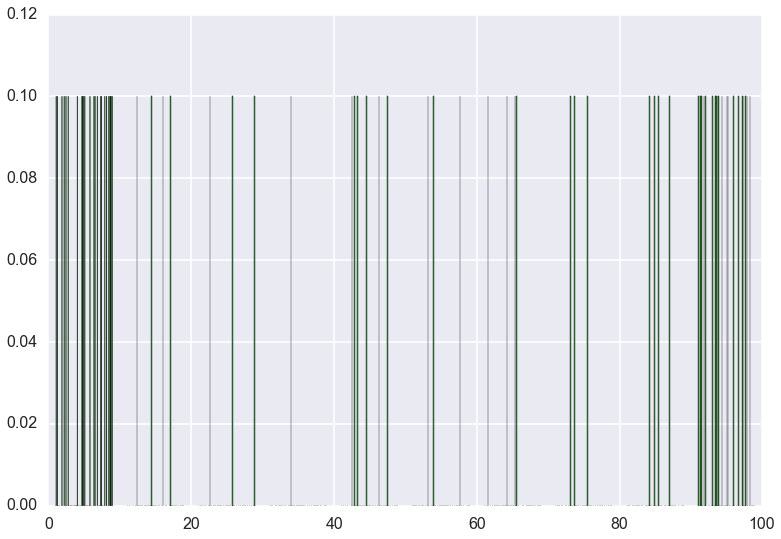

In [20]:
#df_copy = df_01_rel_col[['A10_Out_Of_Business_1']]
df_c = df_copy.values.tolist()
#len(df_copy)
#plt.hist(df_c, bins=3)
#df_01.sum()

n, bins, patches = plt.hist(df_c, normed=1, facecolor='green', alpha=0.75)
#l = plt.plot(bins, y, 'r--', linewidth=1)
#plt.show()

In [21]:
plt.show()

In [22]:
df_02 = read_year_data('_2')
df_02.head()

,A10_Out_Of_Business_2,A11a_Bankruptcy_2,A5New_Actively_involved_2,A5_Actively_involved_2,A8_Addr_ver_2,Age_Owner_01_R_2,Age_Owner_02_R_2,Age_Owner_03_R_2,Age_Owner_04_R_2,Age_Owner_05_R_2,Age_Owner_06_R_2,Age_Owner_07_R_2,Age_Owner_08_R_2,Age_Owner_09_R_2,Age_Owner_10_R_2,C10_MoreLocations_2,C11_Num_Locations_2,C11a_2ndOpening_Month_2,C11a_2ndOpening_Year_2,C1a_NAICS_verification_2,C1z2_Legal_Status_2,C1z_Confirm_Legal_Status_2,C2_Owners_2,C3a_Owner_Operators_2,C4_NumOwners_Confirm_2,C5_Num_Employees_2,C5b_Num_Employees_Change_2,C5c_Num_Employees_Change_Amt_2,C6_Num_FT_Employees_2,C7_Num_PT_Employees_2,C8_Primary_Loc_2,C8z_Primary_Loc_Confirm_2,C9_Loc_Change_Reason_2,Census_Region_2,D1a_Provide_Service_2,D1b_Provide_Product_2,D2_Comp_Advantage_2,D4_a_Lic_Out_Patent_2,D4_b_Lic_Out_Copyright_2,D4_c_Lic_Out_Trademark_2,D5_a_Lic_In_Patent_2,D5_b_Lic_In_Copyright_2,D5_c_Lic_In_Trademark_2,D6_Have_Sales_2,D7_Perc_Sales_Bus_2,D7_Perc_Sales_Govt_2,D7_Perc_Sales_Indiv_2,E1_a_Num_Human_Res_2,E1_b_Num_Sales_2,E1_c_Num_Exec_Admin_2,...,Tot_PersLoan_Bank_Owed_Othrs_R_2,Tot_PersLoan_Fam_OthrOwners_R_2,Tot_PersLoan_Fam_Owed_Othrs_R_2,Tot_PersLoan_Other_Owed_Resp_R_2,Tot_PersLoan_Othr_Owed_Othrs_R_2,Tot_Pers_CredCard_Bal_Others_R_2,Tot_Pers_CredCard_Bal_Resp_R_2,Tot_Pers_CredCard_Line_Othrs_R_2,Tot_Pers_CredCard_Line_Resp_R_2,Tot_Pers_Debt_Other_Owners_R_2,Tot_Pers_Debt_Owed_OthrOwnrs_R_2,Tot_Pers_Debt_Owed_Resp_R_2,Tot_Pers_Debt_Resp_R_2,Tot_Pers_Loan_Bank_Others_R_2,Tot_Pers_Loan_Bank_Owed_Resp_R_2,Tot_Pers_Loan_Bank_Resp_R_2,Tot_Pers_Loan_Fam_Owed_Resp_R_2,Tot_Pers_Loan_Fam_Resp_R_2,Tot_Pers_Loan_Other_Owners_R_2,Tot_Pers_Loan_Other_Resp_R_2,Tot_Pers_Other_Other_Owners_R_2,Tot_Pers_Other_Owed_Others_R_2,Tot_Pers_Other_Owed_Resp_R_2,Tot_Pers_Other_Resp_R_2,Tot_Personal_Use_2006_R_2,Tot_Profit_R_2,Tot_Revenue_R_2,Tot_Trade_Finan_R_2,Tot_Wages_R_2,TotalOwners_2,Total_Copyrights_2,Total_Hours_Owner_01_R_2,Total_Hours_Owner_02_R_2,Total_Hours_Owner_03_R_2,Total_Hours_Owner_04_R_2,Total_Hours_Owner_05_R_2,Total_Hours_Owner_06_R_2,Total_Hours_Owner_07_R_2,Total_Hours_Owner_08_R_2,Total_Hours_Owner_09_R_2,Total_Hours_Owner_10_R_2,Total_Patents_2,Total_Trademarks_2,Website_2,Wgt_Final_F2_2,credrisk_2,hightech_2,techempl_2,techgenr_2,wgt_final_f12_long_2
1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.204142,2,1,1,1,3.200374
2,NaN,NaN,NaN,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1,1,1,1,1,1,01,3,NaN,01,00,1,1,NaN,1,1,0,0,NaN,NaN,NaN,0,0,0,1,0,0,100,00,01,01,...,NaN,NaN,NaN,0,NaN,NaN,0,NaN,5,NaN,NaN,3,3,NaN,0,0,0,0,NaN,0,NaN,NaN,0,0,2,3,0,0,0,1,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,20.625456,3,0,0,0,20.713455
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,4,0,0,0,0.000000
4,NaN,NaN,NaN,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1,1,1,1,1,1,00,3,NaN,,,2,1,NaN,3,1,1,0,NaN,NaN,0,0,0,0,1,0,10,90,,,,...,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,NaN,0,NaN,NaN,0,0,0,4,7,6,NaN,1,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,19.340121,3,0,0,0,19.430043
5,NaN,NaN,NaN,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1,2,1,1,1,1,00,3,NaN,,,1,1,NaN,1,1,0,1,NaN,NaN,NaN,0,0,0,1,100,0,0,,,,...,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,NaN,0,NaN,NaN,0,0,2,0,0,0,NaN,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,7.686683,3,0,0,0,7.753953


In [23]:
df_03 = read_year_data('_3')
df_03.head()

,A10_Out_Of_Business_3,A11_Year_Closed_3,A11a_Bankruptcy_3,A5New_Actively_involved_3,A5_Actively_involved_3,A8_Addr_ver_3,Age_Owner_01_R_3,Age_Owner_02_R_3,Age_Owner_03_R_3,Age_Owner_04_R_3,Age_Owner_05_R_3,Age_Owner_06_R_3,Age_Owner_07_R_3,Age_Owner_08_R_3,Age_Owner_09_R_3,Age_Owner_10_R_3,Age_Owner_11_R_3,C10_MoreLocations_3,C11_Num_Locations_3,C11a_2ndOpening_Month_3,C11a_2ndOpening_Year_3,C1a_NAICS_verification_3,C1z2_Legal_Status_3,C1z_Confirm_Legal_Status_3,C2_Owners_3,C3a_Owner_Operators_3,C4_NumOwners_Confirm_3,C5_Num_Employees_3,C5b_Num_Employees_Change_3,C5c_Num_Employees_Change_Amt_3,C6_Num_FT_Employees_3,C7_Num_PT_Employees_3,C8_Primary_Loc_3,C8z_Primary_Loc_Confirm_3,C9_Loc_Change_Reason_3,Census_Region_3,D1a_Provide_Service_3,D1b_Provide_Product_3,D2_Comp_Advantage_3,D2a_CompAdv_Comp_Reason_3,D2a_CompAdv_GovLab_Reason_3,D2a_CompAdv_Patents_Reason_3,D2a_CompAdv_Univ_Reason_3,D2b_CompAdv_Comp_Strength_3,D2b_CompAdv_GovLab_Strength_3,D2b_CompAdv_Patents_Strength_3,D2b_CompAdv_Univ_Strength_3,D4_a_Lic_Out_Patent_3,D4_b_Lic_Out_Copyright_3,D4_c_Lic_Out_Trademark_3,...,Tot_PersLoan_Fam_Owed_Othrs_R_3,Tot_PersLoan_Other_Owed_Resp_R_3,Tot_PersLoan_Othr_Owed_Othrs_R_3,Tot_Pers_CredCard_Bal_Others_R_3,Tot_Pers_CredCard_Bal_Resp_R_3,Tot_Pers_CredCard_Line_Othrs_R_3,Tot_Pers_CredCard_Line_Resp_R_3,Tot_Pers_Debt_Other_Owners_R_3,Tot_Pers_Debt_Owed_OthrOwnrs_R_3,Tot_Pers_Debt_Owed_Resp_R_3,Tot_Pers_Debt_Resp_R_3,Tot_Pers_Loan_Bank_Others_R_3,Tot_Pers_Loan_Bank_Owed_Resp_R_3,Tot_Pers_Loan_Bank_Resp_R_3,Tot_Pers_Loan_Fam_Owed_Resp_R_3,Tot_Pers_Loan_Fam_Resp_R_3,Tot_Pers_Loan_Other_Owners_R_3,Tot_Pers_Loan_Other_Resp_R_3,Tot_Pers_Other_Other_Owners_R_3,Tot_Pers_Other_Owed_Others_R_3,Tot_Pers_Other_Owed_Resp_R_3,Tot_Pers_Other_Resp_R_3,Tot_Personal_Use_2007_R_3,Tot_Profit_R_3,Tot_Res_Dev_R_3,Tot_Revenue_R_3,Tot_Trade_Finan_R_3,Tot_Wages_R_3,TotalOwners_3,Total_Copyrights_3,Total_Hours_Owner_01_R_3,Total_Hours_Owner_02_R_3,Total_Hours_Owner_03_R_3,Total_Hours_Owner_04_R_3,Total_Hours_Owner_05_R_3,Total_Hours_Owner_06_R_3,Total_Hours_Owner_07_R_3,Total_Hours_Owner_08_R_3,Total_Hours_Owner_09_R_3,Total_Hours_Owner_10_R_3,Total_Hours_Owner_11_R_3,Total_Patents_3,Total_Trademarks_3,Website_3,credrisk_3,hightech_3,techempl_3,techgenr_3,wgt_final_f123_long_3,wgt_final_f3_3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,2,0,0,0,2.694008,2.042728
2,NaN,NaN,NaN,NaN,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,,NaN,NaN,1,1,1,1,1,1,00,3,NaN,,,1,1,NaN,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,0,NaN,5,NaN,NaN,1,0,NaN,0,0,0,0,NaN,0,NaN,NaN,0,0,2,2,0,2,0,NaN,1,000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,00,1,3,0,0,0,23.228255,20.732812
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,4,0,0,0,0.000000,0.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,3,0,0,0,0.000000,0.000000
5,NaN,NaN,NaN,NaN,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,,NaN,NaN,1,2,1,1,1,1,00,3,NaN,,,1,1,NaN,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,NaN,0,NaN,N

In [24]:
df_04 = read_year_data('_4')
df_04.head()

,A10_Out_Of_Business_4,A11_Year_Closed_4,A11a_Bankruptcy_4,A11b_Economy_Effect_4,A5New_Actively_involved_4,A5_Actively_involved_4,A8_Addr_ver_4,Age_Owner_01_R_4,Age_Owner_02_R_4,Age_Owner_03_R_4,Age_Owner_04_R_4,Age_Owner_05_R_4,Age_Owner_06_R_4,Age_Owner_07_R_4,Age_Owner_08_R_4,Age_Owner_09_R_4,Age_Owner_10_R_4,Age_Owner_11_R_4,Age_Owner_12_R_4,Age_Owner_13_R_4,Age_Owner_14_R_4,C10_MoreLocations_4,C11_Num_Locations_4,C11a_2ndOpening_Month_4,C11a_2ndOpening_Year_4,C12a_SBA_4,C12b_Fed_Gov_4,C12c_StateLocal_Gov_4,C12d_Non_Profit_4,C12e_College_Univ_4,C12f_Chamber_of_Comm_4,C12g_For_Profit_Org_4,C12h_Other_4,C1a_NAICS_verification_4,C1z2_Legal_Status_4,C1z_Confirm_Legal_Status_4,C2_Owners_4,C3a_Owner_Operators_4,C4_NumOwners_Confirm_4,C5_Num_Employees_4,C6_Num_FT_Employees_4,C7_Num_PT_Employees_4,C8_Primary_Loc_4,C8z_Primary_Loc_Confirm_4,C9_Loc_Change_Reason_4,Census_Region_4,D1a_Provide_Service_4,D1b_Provide_Product_4,D2_Comp_Advantage_4,D2a_CompAdv_Comp_Reason_4,...,Tot_Pers_CredCard_Bal_Others_R_4,Tot_Pers_CredCard_Bal_Resp_R_4,Tot_Pers_CredCard_Line_Othrs_R_4,Tot_Pers_CredCard_Line_Resp_R_4,Tot_Pers_Debt_Other_Owners_R_4,Tot_Pers_Debt_Owed_OthrOwnrs_R_4,Tot_Pers_Debt_Owed_Resp_R_4,Tot_Pers_Debt_Resp_R_4,Tot_Pers_Loan_Bank_Others_R_4,Tot_Pers_Loan_Bank_Owed_Resp_R_4,Tot_Pers_Loan_Bank_Resp_R_4,Tot_Pers_Loan_Fam_Owed_Resp_R_4,Tot_Pers_Loan_Fam_Resp_R_4,Tot_Pers_Loan_Other_Owners_R_4,Tot_Pers_Loan_Other_Resp_R_4,Tot_Pers_Other_Other_Owners_R_4,Tot_Pers_Other_Owed_Others_R_4,Tot_Pers_Other_Owed_Resp_R_4,Tot_Pers_Other_Resp_R_4,Tot_Personal_Use_2008_R_4,Tot_Profit_R_4,Tot_Res_Dev_R_4,Tot_Revenue_R_4,Tot_Trade_Finan_R_4,Tot_Wages_R_4,TotalOwners_4,Total_Copyrights_4,Total_Hours_Owner_01_R_4,Total_Hours_Owner_02_R_4,Total_Hours_Owner_03_R_4,Total_Hours_Owner_04_R_4,Total_Hours_Owner_05_R_4,Total_Hours_Owner_06_R_4,Total_Hours_Owner_07_R_4,Total_Hours_Owner_08_R_4,Total_Hours_Owner_09_R_4,Total_Hours_Owner_10_R_4,Total_Hours_Owner_11_R_4,Total_Hours_Owner_12_R_4,Total_Hours_Owner_13_R_4,Total_Hours_Owner_14_R_4,Total_Patents_4,Total_Trademarks_4,Website_4,credrisk_4,hightech_4,techempl_4,techgenr_4,wgt_final_f1234_long_4,wgt_final_f4_4
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,3,0,0,0,2.903488,2.210894
2,NaN,NaN,NaN,NaN,NaN,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,,NaN,NaN,0,0,0,0,1,NaN,0,0,1,1,1,1,1,1,01,01,00,1,1,NaN,1,1,0,0,NaN,...,NaN,2,NaN,5,NaN,NaN,3,3,NaN,0,0,0,0,NaN,0,NaN,NaN,0,0,3,1,0,5,0,0,1,000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,00,1,2,0,0,0,22.547376,22.349690
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,2,0,0,0,0.000000,0.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,2,0,0,0,0.000000,0.000000
5,NaN,NaN,NaN,NaN,NaN,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,,NaN,NaN,0,0,1,0,0,0,0,0,1,2,1,1,1,1,00,,,1,1,NaN,1,1,0,0,NaN,...,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,NaN,0,NaN,NaN,0,0,0,NaN,0,0,0,NaN,1,000,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,00,0,3,0,0,0,8.439859,8.008999


In [25]:
df_05 = read_year_data('_5')
df_05.head()

,A10_Out_Of_Business_5,A11_Year_Closed_5,A11a_Bankruptcy_5,A5_Actively_involved_5,A8_Addr_ver_5,Age_Owner_01_R_5,Age_Owner_02_R_5,Age_Owner_03_R_5,Age_Owner_04_R_5,Age_Owner_05_R_5,Age_Owner_06_R_5,Age_Owner_07_R_5,Age_Owner_08_R_5,Age_Owner_09_R_5,Age_Owner_10_R_5,Age_Owner_11_R_5,Age_Owner_12_R_5,Age_Owner_13_R_5,Age_Owner_14_R_5,Age_Owner_15_R_5,C10_MoreLocations_5,C11_Num_Locations_5,C11a_2ndOpening_Month_5,C11a_2ndOpening_Year_5,C1a_NAICS_verification_5,C1z2_Legal_Status_5,C1z3_State_Chartered_5,C1z_Confirm_Legal_Status_5,C2_Owners_5,C3a_Owner_Operators_5,C4_NumOwners_Confirm_5,C5_Num_Employees_5,C6_Num_FT_Employees_5,C7_Num_PT_Employees_5,C8_Primary_Loc_5,C8z_Primary_Loc_Confirm_5,C9_Loc_Change_Reason_5,Census_Region_5,D1_a_New_Product_5,D1_b_New_to_Market_5,D1a_Provide_Service_5,D1b_Provide_Product_5,D1c_a_Regional_5,D1c_b_National_5,D1c_c_International_5,D1d_New_Processes_5,D2_Comp_Advantage_5,D2a_CompAdv_Comp_Reason_5,D2a_CompAdv_GovLab_Reason_5,D2a_CompAdv_Patents_Reason_5,...,Tot_Pers_CredCard_Bal_Resp_R_5,Tot_Pers_CredCard_Line_Othrs_R_5,Tot_Pers_CredCard_Line_Resp_R_5,Tot_Pers_Debt_Other_Owners_R_5,Tot_Pers_Debt_Owed_OthrOwnrs_R_5,Tot_Pers_Debt_Owed_Resp_R_5,Tot_Pers_Debt_Resp_R_5,Tot_Pers_Loan_Bank_Others_R_5,Tot_Pers_Loan_Bank_Owed_Resp_R_5,Tot_Pers_Loan_Bank_Resp_R_5,Tot_Pers_Loan_Fam_Owed_Resp_R_5,Tot_Pers_Loan_Fam_Resp_R_5,Tot_Pers_Loan_Other_Owners_R_5,Tot_Pers_Loan_Other_Resp_R_5,Tot_Pers_Other_Other_Owners_R_5,Tot_Pers_Other_Owed_Others_R_5,Tot_Pers_Other_Owed_Resp_R_5,Tot_Pers_Other_Resp_R_5,Tot_Personal_Use_2009_R_5,Tot_Profit_R_5,Tot_Res_Dev_R_5,Tot_Revenue_R_5,Tot_Trade_Finan_R_5,Tot_Wages_R_5,TotalOwners_5,Total_Copyrights_5,Total_Hours_Owner_01_R_5,Total_Hours_Owner_02_R_5,Total_Hours_Owner_03_R_5,Total_Hours_Owner_04_R_5,Total_Hours_Owner_05_R_5,Total_Hours_Owner_06_R_5,Total_Hours_Owner_07_R_5,Total_Hours_Owner_08_R_5,Total_Hours_Owner_09_R_5,Total_Hours_Owner_10_R_5,Total_Hours_Owner_11_R_5,Total_Hours_Owner_12_R_5,Total_Hours_Owner_13_R_5,Total_Hours_Owner_14_R_5,Total_Hours_Owner_15_R_5,Total_Patents_5,Total_Trademarks_5,Website_5,credrisk_5,hightech_5,techempl_5,techgenr_5,wgt_final_f5_5,wgt_final_f5_long_5
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,0,0,0,2.063936,3.357279
2,NaN,NaN,NaN,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,,NaN,NaN,1,1,,1,1,1,1,00,,,1,1,NaN,1,0,NaN,1,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,...,0,NaN,6,NaN,NaN,1,0,NaN,0,0,0,0,NaN,0,NaN,NaN,0,0,2,3,0,6,0,NaN,1,000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,00,1,3,0,0,0,21.356135,24.927570
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,2,0,0,0,0.000000,0.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,2,0,0,0,0.000000,0.000000
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,N

In [26]:
df_06 = read_year_data('_6')
df_06.head()

,A10_Out_Of_Business_6,A11_Year_Closed_6,A11a_Bankruptcy_6,A5_Actively_involved_6,A8_Addr_ver_6,Age_Owner_01_R_6,Age_Owner_02_R_6,Age_Owner_03_R_6,Age_Owner_04_R_6,Age_Owner_05_R_6,Age_Owner_06_R_6,Age_Owner_07_R_6,Age_Owner_08_R_6,Age_Owner_09_R_6,Age_Owner_10_R_6,Age_Owner_11_R_6,Age_Owner_12_R_6,Age_Owner_13_R_6,Age_Owner_14_R_6,Age_Owner_15_R_6,C10_MoreLocations_6,C11_Num_Locations_6,C11a_2ndOpening_Month_6,C11a_2ndOpening_Year_6,C1a_NAICS_verification_6,C1z2_Legal_Status_6,C1z_Confirm_Legal_Status_6,C2_Owners_6,C3a_Owner_Operators_6,C4_NumOwners_Confirm_6,C5_Num_Employees_6,C6_Num_FT_Employees_6,C7_Num_PT_Employees_6,C8_Primary_Loc_6,C8z_Primary_Loc_Confirm_6,C9_Loc_Change_Reason_6,Census_Region_6,D1_a_New_Product_6,D1_b_New_to_Market_6,D1a_Provide_Service_6,D1b_Provide_Product_6,D1c_a_Regional_6,D1c_b_National_6,D1c_c_International_6,D1d_New_Processes_6,D2_Comp_Advantage_6,D2a_CompAdv_Comp_Reason_6,D2a_CompAdv_GovLab_Reason_6,D2a_CompAdv_Patents_Reason_6,D2a_CompAdv_Univ_Reason_6,...,Tot_Pers_CredCard_Bal_Resp_R_6,Tot_Pers_CredCard_Line_Othrs_R_6,Tot_Pers_CredCard_Line_Resp_R_6,Tot_Pers_Debt_Other_Owners_R_6,Tot_Pers_Debt_Owed_OthrOwnrs_R_6,Tot_Pers_Debt_Owed_Resp_R_6,Tot_Pers_Debt_Resp_R_6,Tot_Pers_Loan_Bank_Others_R_6,Tot_Pers_Loan_Bank_Owed_Resp_R_6,Tot_Pers_Loan_Bank_Resp_R_6,Tot_Pers_Loan_Fam_Owed_Resp_R_6,Tot_Pers_Loan_Fam_Resp_R_6,Tot_Pers_Loan_Other_Owners_R_6,Tot_Pers_Loan_Other_Resp_R_6,Tot_Pers_Other_Other_Owners_R_6,Tot_Pers_Other_Owed_Others_R_6,Tot_Pers_Other_Owed_Resp_R_6,Tot_Pers_Other_Resp_R_6,Tot_Personal_Use_2010_R_6,Tot_Profit_R_6,Tot_Res_Dev_R_6,Tot_Revenue_R_6,Tot_Trade_Finan_R_6,Tot_Wages_R_6,TotalOwners_6,Total_Copyrights_6,Total_Hours_Owner_01_R_6,Total_Hours_Owner_02_R_6,Total_Hours_Owner_03_R_6,Total_Hours_Owner_04_R_6,Total_Hours_Owner_05_R_6,Total_Hours_Owner_06_R_6,Total_Hours_Owner_07_R_6,Total_Hours_Owner_08_R_6,Total_Hours_Owner_09_R_6,Total_Hours_Owner_10_R_6,Total_Hours_Owner_11_R_6,Total_Hours_Owner_12_R_6,Total_Hours_Owner_13_R_6,Total_Hours_Owner_14_R_6,Total_Hours_Owner_15_R_6,Total_Patents_6,Total_Trademarks_6,Website_6,credrisk_6,hightech_6,techempl_6,techgenr_6,wgt_final_f6_6,wgt_final_f6_long_6
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,2.585146,3.599425
2,NaN,NaN,NaN,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,,NaN,NaN,1,1,1,01,1,1,00,,,1,1,NaN,1,0,NaN,1,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,...,0,NaN,5,NaN,NaN,1,0,NaN,0,0,0,0,NaN,0,NaN,NaN,0,0,1,1,0,6,0,NaN,1,000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,00,1,3,0,0,0,22.257370,24.897140
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,2,0,0,0,0.000000,0.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,3,0,0,0,0.000000,0.000000
5,4,2010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [27]:
df_07 = read_year_data('_7')
df_07.head()

,A10_Out_Of_Business_7,A11_Year_Closed_7,A11a_Bankruptcy_7,A5_Actively_involved_7,A8_Addr_ver_7,Age_Owner_01_R_7,Age_Owner_02_R_7,Age_Owner_03_R_7,Age_Owner_04_R_7,Age_Owner_05_R_7,Age_Owner_06_R_7,Age_Owner_07_R_7,Age_Owner_08_R_7,Age_Owner_09_R_7,Age_Owner_10_R_7,Age_Owner_11_R_7,Age_Owner_12_R_7,Age_Owner_13_R_7,Age_Owner_14_R_7,Age_Owner_15_R_7,C10_MoreLocations_7,C11_Num_Locations_7,C11a_2ndOpening_Month_7,C11a_2ndOpening_Year_7,C1a_NAICS_verification_7,C1z2_Legal_Status_7,C1z_Confirm_Legal_Status_7,C2_Owners_7,C3a_Owner_Operators_7,C4_NumOwners_Confirm_7,C5_Num_Employees_7,C6_Num_FT_Employees_7,C7_Num_PT_Employees_7,C8_Primary_Loc_7,C8z_Primary_Loc_Confirm_7,C9_Loc_Change_Reason_7,Census_Region_7,D1_a_New_Product_7,D1_b_New_to_Market_7,D1a_Provide_Service_7,D1b_Provide_Product_7,D1c_a_Regional_7,D1c_b_National_7,D1c_c_International_7,D1d_New_Processes_7,D2_Comp_Advantage_7,D2a_CompAdv_Comp_Reason_7,D2a_CompAdv_GovLab_Reason_7,D2a_CompAdv_Patents_Reason_7,D2a_CompAdv_Univ_Reason_7,...,Tot_Pers_CredCard_Bal_Resp_R_7,Tot_Pers_CredCard_Line_Othrs_R_7,Tot_Pers_CredCard_Line_Resp_R_7,Tot_Pers_Debt_Other_Owners_R_7,Tot_Pers_Debt_Owed_OthrOwnrs_R_7,Tot_Pers_Debt_Owed_Resp_R_7,Tot_Pers_Debt_Resp_R_7,Tot_Pers_Loan_Bank_Others_R_7,Tot_Pers_Loan_Bank_Owed_Resp_R_7,Tot_Pers_Loan_Bank_Resp_R_7,Tot_Pers_Loan_Fam_Owed_Resp_R_7,Tot_Pers_Loan_Fam_Resp_R_7,Tot_Pers_Loan_Other_Owners_R_7,Tot_Pers_Loan_Other_Resp_R_7,Tot_Pers_Other_Other_Owners_R_7,Tot_Pers_Other_Owed_Others_R_7,Tot_Pers_Other_Owed_Resp_R_7,Tot_Pers_Other_Resp_R_7,Tot_Personal_Use_2011_R_7,Tot_Profit_R_7,Tot_Res_Dev_R_7,Tot_Revenue_R_7,Tot_Trade_Finan_R_7,Tot_Wages_R_7,TotalOwners_7,Total_Copyrights_7,Total_Hours_Owner_01_R_7,Total_Hours_Owner_02_R_7,Total_Hours_Owner_03_R_7,Total_Hours_Owner_04_R_7,Total_Hours_Owner_05_R_7,Total_Hours_Owner_06_R_7,Total_Hours_Owner_07_R_7,Total_Hours_Owner_08_R_7,Total_Hours_Owner_09_R_7,Total_Hours_Owner_10_R_7,Total_Hours_Owner_11_R_7,Total_Hours_Owner_12_R_7,Total_Hours_Owner_13_R_7,Total_Hours_Owner_14_R_7,Total_Hours_Owner_15_R_7,Total_Patents_7,Total_Trademarks_7,Website_7,credrisk_7,hightech_7,techempl_7,techgenr_7,wgt_final_f7_7,wgt_final_f7_long_7
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,,NaN,NaN,NaN,1.949016,3.098758
2,NaN,NaN,NaN,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,,NaN,NaN,1,1,1,01,1,1,00,,,1,1,NaN,1,0,NaN,1,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,...,0,NaN,5,NaN,NaN,1,1,NaN,0,0,0,0,NaN,0,NaN,NaN,0,0,5,3,4,6,0,0,1,000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,00,1,3,0,0,0,19.858225,25.186329
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,,0,0,0,0.000000,0.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,2,0,0,0,0.000000,0.000000
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,,,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [28]:

#filter_col = [col for col in list(df) if "business" in col]
#temp = list(df)
#temp



In [29]:
#df = pd.read_csv("/Users/mobolajioo/Downloads/ratecompositionunderlyingksia2015.csv")
#df.head()
#df.shape
#df.dtypes
#df_copy_2 = df[df['yeart1'] == 2014]
#df_copy = df["yeart1"].tolist()
#len(df_copy_2)
#len(df_copy)
#plt.hist(df_copy, bins=30)
#df_copy.hist()
#arr = smio.genfromdta('/Users/mobolajioo/Downloads/KFS8---PublicUse-101413---STATA.dta')
#arr = smio.genfromdta('/Users/mobolajioo/Desktop/Public_Use_LI_Long.dta')
#df2 = pd.read_stata('/Users/mobolajioo/Desktop/Public_Use_LI_Long.dta')
#df2.head()

